<a href="https://colab.research.google.com/github/karencfisher/DS-Unit-2-Linear-Models/blob/master/module1-regression-1/LS_DS_211_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

If your **Plotly** visualizations aren't working:
- You must have JavaScript enabled in your browser
- You probably want to use Chrome or Firefox
- You may need to turn off ad blockers
- [If you're using Jupyter Lab locally, you need to install some "extensions"](https://plot.ly/python/getting-started/#jupyterlab-support-python-35)

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [0]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [0]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

### Take some basic looks at the dataframe

In [4]:
df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
df.shape

(48818, 34)

There are some missing values, but they don't seem to be in features I'll use for linear regression anyway. (Text descriptions)

In [6]:
df.isnull().sum()

bathrooms                  0
bedrooms                   0
created                    0
description             1425
display_address          133
latitude                   0
longitude                  0
price                      0
street_address            10
interest_level             0
elevator                   0
cats_allowed               0
hardwood_floors            0
dogs_allowed               0
doorman                    0
dishwasher                 0
no_fee                     0
laundry_in_building        0
fitness_center             0
pre-war                    0
laundry_in_unit            0
roof_deck                  0
outdoor_space              0
dining_room                0
high_speed_internet        0
balcony                    0
swimming_pool              0
new_construction           0
terrace                    0
exclusive                  0
loft                       0
garden_patio               0
wheelchair_access          0
common_outdoor_space       0
dtype: int64

###Some basic data exploration.

In [7]:
# See what we have for types. Mostly numerical.
df.dtypes

bathrooms               float64
bedrooms                  int64
created                  object
description              object
display_address          object
latitude                float64
longitude               float64
price                     int64
street_address           object
interest_level           object
elevator                  int64
cats_allowed              int64
hardwood_floors           int64
dogs_allowed              int64
doorman                   int64
dishwasher                int64
no_fee                    int64
laundry_in_building       int64
fitness_center            int64
pre-war                   int64
laundry_in_unit           int64
roof_deck                 int64
outdoor_space             int64
dining_room               int64
high_speed_internet       int64
balcony                   int64
swimming_pool             int64
new_construction          int64
terrace                   int64
exclusive                 int64
loft                      int64
garden_p

###Descriptive statistics for features, both numeric and non-numeric.

In [8]:
df.describe()

,bathrooms,bedrooms,latitude,longitude,price,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
count,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.00000,48818.000000,48818.000000
mean,1.201790,1.537158,40.750756,-73.972758,3579.560982,0.524827,0.478266,0.478266,0.447622,0.424843,0.415072,0.367078,0.052767,0.268446,0.185649,0.175898,0.132758,0.138392,0.102831,0.087201,0.060469,0.055205,0.051907,0.046192,0.043304,0.042710,0.03933,0.027224,0.026240
std,0.470707,1.106078,0.038962,0.028887,1762.420875,0.499388,0.499533,0.499533,0.497254,0.494324,0.492740,0.482013,0.223571,0.443156,0.388827,0.380737,0.339317,0.345314,0.303741,0.282133,0.238357,0.228382,0.221842,0.209903,0.203542,0.202204,0.19438,0.162736,0.159851
min,0.000000,0.000000,40.571200,-74.087300,1375.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,1.000000,40.728300,-73.991800,2500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,1.000000,40.751700,-73.978000,3150.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,2.000000,40.774000,-73.955000,4095.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,10.000000,8.000000,40.989400,-73.700100,15500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [9]:
df.describe(exclude='number')

,created,description,display_address,street_address,interest_level
count,48818,47393,48685,48808,48818
unique,48149,37854,8675,15136,3
top,2016-06-05 01:32:36,,Broadway,3333 Broadway,low
freq,3,1627,435,174,33947


###Most of the features are numeric, but binary.

Numbers of bathrooms and bedrooms vary a little bit more, as does 'interest level.'

In [0]:
import matplotlib.pyplot as plt


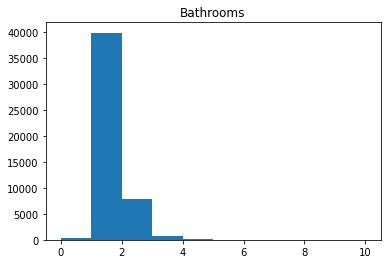

In [11]:
# Are there really rentals with 10 bathrooms?
plt.hist(df['bathrooms'])
plt.title('Bathrooms');

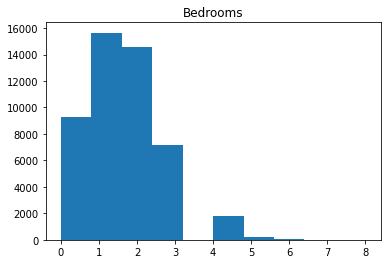

In [12]:
plt.hist(df['bedrooms'])
plt.title('Bedrooms');

### Scatter plots of rents by these features

In [13]:
# Create scatter plot rents by number of bathrooms
import plotly.express as px
fig = px.scatter(df, x='bathrooms', y='price')
fig.update_layout(
    title_text='Rents by number of bathrooms'
)
fig.show()

In [14]:
# Create scatter plot rents by number of bedrooms
import plotly.express as px
fig = px.scatter(df, x='bedrooms', y='price')
fig.update_layout(
    title_text='Rents by number of bedrooms'
)
fig.show()

In [15]:
# Create scatter plot rents by if pre-war
import plotly.express as px
fig = px.scatter(df, x='pre-war', y='price')
fig.update_layout(
    title_text='Rents by being pre-war'
)
fig.show()

In [16]:
# Create scatter plot rents by exclusive
import plotly.express as px
fig = px.scatter(df, x='exclusive', y='price')
fig.update_layout(
    title_text='Rents by exclusivity'
)
fig.show()

###Some interesting feature engineering.

Ome of these features seem less than inspiring for linear regression, except maybe number of bathrooms or bedrooms. Other numerical features are all essentially binary categorical values (1 or 0: e.g. allows cats, or doesn't). I choose here to engineer another continuous feature. And an interesting question arises:

**Are rents correlative with the relative distance of an apartment from Central Park?** 

From the latitudes and longitudes, we can calculate the distances to each property from the park (40.785091 latitude, -73.968285 longtitude) in km, and plot those distances against prices. And there does appear to be an inverse correlation -- apartments further from the park seem less expensive (as no doubt any New Yorker will probably tell you: the closer to the park, the more exclusive). Or at least, one does not see pricier units further from it.

In [0]:
import math

def distances(coord1, coord2):
    '''
    Calculate distance between two points given their latitudes/longitudes
    using haversine method (from https://janakiev.com/blog/gps-points-distance-python/)

    Input: two coordinates as tuples, (lat, lon)
    Output: distance in KM
    '''

    R = 6372.800  # Earth radius in km
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    
    # coordinates have to be converted to radians
    phi1, phi2 = math.radians(lat1), math.radians(lat2) 
    dphi       = math.radians(lat2 - lat1)
    dlambda    = math.radians(lon2 - lon1)
    
    a = math.sin(dphi/2)**2 + \
        math.cos(phi1)*math.cos(phi2)*math.sin(dlambda/2)**2
    
    return 2*R*math.atan2(math.sqrt(a), math.sqrt(1 - a))


In [18]:
# Coordinates for Central Park
central_coords = (40.785091, -73.968285)

# Add a new column
df['distance'] = 0.00

# And calculate distances
for i in df.index:
  distance = distances(central_coords, (df.loc[i]['latitude'], df.loc[i]['longitude']))
  df.at[i, 'distance'] = distance
  
df[['latitude', 'longitude', 'distance']].head()

,latitude,longitude,distance
0,40.7145,-73.9425,8.146645
1,40.7947,-73.9667,1.077076
2,40.7388,-74.0018,5.872147
3,40.7539,-73.9677,3.469611
4,40.8241,-73.9493,4.623880


In [19]:
# Create scatter plot rents by distance to the park
import plotly.express as px
fig = px.scatter(df, x='distance', y='price')
fig.update_layout(
    title_text='Rents by distance from Central Park'
)
fig.show()


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

### Write a function to generalize making a model and testing it.

This will make it easier to try out different features

In [0]:
def regression(model_class, df, features, target):
  '''
  Perform regression on data

  Inputs:
  model_class: model being used (e.g. LinearRegression)
  df: the dataframe
  features: list of features X
  target: the y value being predicted

  Output:
  Returns the resultant model object
  '''
  
  # Instantiate the linear regression model 
  model = model_class()

  # Split data into X (features) and y (target)
  X = df[features]
  y = df[target]

  # Additionally we can split into train and test data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                      random_state=42)
  # Fit the model to the training data
  model.fit(X_train, y_train)

  # Print coefficients, bias to STDOUT
  print(f'Coefficients = {model.coef_}\n', f'Bias = {model.intercept_}')

  # Try it on the test data, and get a couple of metrics
  y_predict = model.predict(X_test)

  # Mean absolute error
  MAE = mean_absolute_error(y_test, y_predict)

  # R^2
  r2 = r2_score(y_test, y_predict)

  # Print metrics to STDOUT
  print(f'MAE on test data: {MAE}\n', f'R^2: {r2}')

  return model

### A function to plot univariate models

In [0]:
def plotModel(df, feature, target, model):
  '''
  Plot univariate model

  Inputs:
  df: dataframe
  feature: the independent variable
  target: thedependent variable
  model: the model from the regression process

  Output:
  A scatter plot showing the regression line and the mean y also as a baseline.
  '''

  assert len(feature) == 1, 'Only suitable to plot a univariate model!'

  # Get the predicted values across the dataframe
  y_predict = model.predict(df[feature])
  
  # Separate feature and target as X and y
  X = df[feature]
  y = df[target]

  # Plot the data, mean (as baseline), and predicted line
  fig = plt.figure(figsize=(10, 7))
  plt.scatter(X, y, alpha=.3)
  plt.plot(X, y_predict, color='red', label=f'Predict {target}')
  plt.axhline(y.mean(), color='green', dashes=(1,2), label=f'Mean {target}')
  plt.title('Data and line of best fit')
  plt.xlabel(feature)
  plt.ylabel(target)
  plt.legend()
  plt.show()


### Functions to predict one input value and make widget to demonstrate it.

In [0]:
# Predict individual input value using model (one value)
def predict_rent(x_value, model, feature):
  y_pred = model.predict([[x_value]])
  estimate = round(y_pred[0], 2)
  coefficient = round(model.coef_[0], 2)
  print(f'${estimate}/month for an apartment {x_value} {feature}.\n',
        f'In this regression, the rent decreases by ${abs(coefficient)}/month for',
        f'each additional {feature}')


In [0]:
# Widget for single value
from ipywidgets import interact, fixed
def makeWidget(model, max_x, feature):
  interact(predict_rent, x_value=(0, max_x), model=fixed(model), 
           feature=fixed(feature));

###Linear Regression on one feature

We'll try our engineered feature first

In [25]:
model1 = regression(LinearRegression, df, ['distance'], 'price')

Coefficients = [-68.73520893]
 Bias = 3935.7105167678174
MAE on test data: 1181.7006112185215
 R^2: 0.018104936499488855


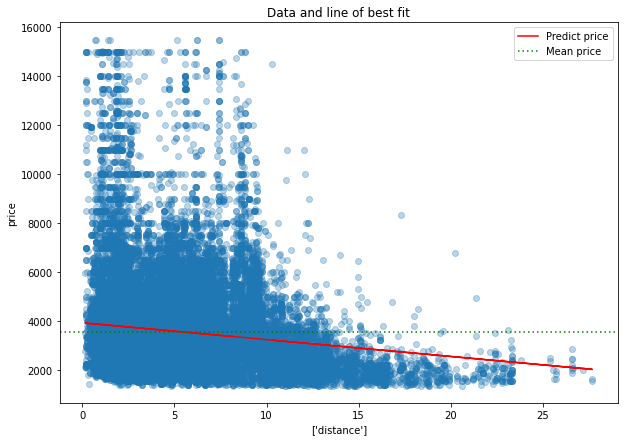

In [26]:
plotModel(df, ['distance'], 'price', model1)

In [27]:
makeWidget(model1, df['distance'].max(), 'KM from park')

interactive(children=(FloatSlider(value=13.84067726561266, description='x_value', max=27.68135453122532), Outp…

### The explanation of the coefficients and intercept from the model

The line being found for the model is a linear equation, such as:

\begin{align}
  y = mx + b
\end{align}

In this simple (one variable) example, the coefficient found by the LinearRegression model is the value for m, which is also known as in algebra the 'slope' of the line. It is the rate, if you will, at which y changes as x changes. It will be positive if sloping upwards, and negative if sloping downwards. 

The b value, algebraically as the 'y-intercept', as it is the y value at which the line intercepts the X axis. It is also known as the bias, as it shifts the line to the left or right.

An example with multiple variables, it will have as many coefficients as variables (or features); and one intercept or bias. So, 

\begin{align}
  y = b+ \sum_{i=1}^{n}{m_ix_i}
\end{align}

In machine learning, $m$ is often denoted as $\theta$. $b$ is denoted as $\theta_0$, each coefficient is $\{\theta_1, \theta_2, \theta_3, ... , \theta_n\}$ By convention $x_0 = 1$, so the linear function can be:

\begin{align}
 f(x) = \sum_{i=0}^{n}{\theta_ix_i}
\end{align}

In [0]:
# Predict function using model as a simple linear equation (slope/intercept form)
def predict(x_value, model):

  assert len(x_value) == len(model.coef_), \
        'Number of feature inputs must be same number of coefficients from the model!'
        
  # Linear equation utilizing the coefficients and intercept from the model
  y = sum([model.coef_[i] * x_value[i] for i in range (len(x_value))]) + model.intercept_
  return round(y, 2)

In [29]:
predict([3], model1)

3729.5

### And also try with the number of bedrooms as univariate feature

In [30]:
model2 = regression(LinearRegression, df, ['bedrooms'], 'price')

Coefficients = [865.9752616]
 Bias = 2250.552409823447
MAE on test data: 979.0734179576074
 R^2: 0.27547560853303354


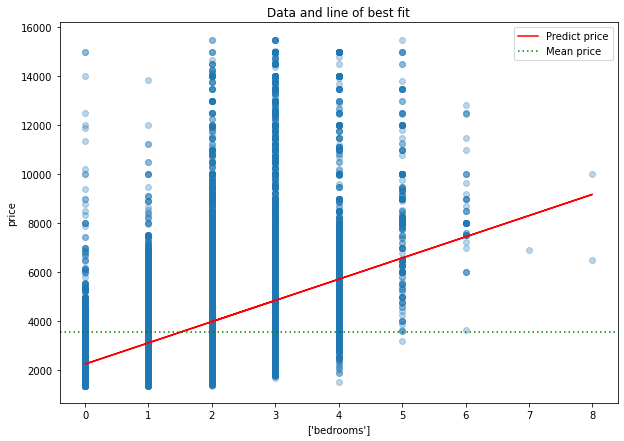

In [31]:
plotModel(df, ['bedrooms'], 'price', model2)

In [32]:
makeWidget(model2, df['bedrooms'].max(), 'bedrooms')

interactive(children=(IntSlider(value=4, description='x_value', max=8), Output()), _dom_classes=('widget-inter…

**Now I guess having more bathrooms is** the height of luxury. And talk about "first world problems." It has the biggest singular impact on the price seen here, anyway! Or, maybe? The one unit with 10 bedrooms is actually fetching an average rental price. So an outlier may be impactin gour model. Five bedrooms though does seem pricey.

In [33]:
model7 = regression(LinearRegression, df, ['bathrooms'], 'price')

Coefficients = [2598.97179532]
 Bias = 454.47810287092125
MAE on test data: 890.0945271924379
 R^2: 0.46012874975869567


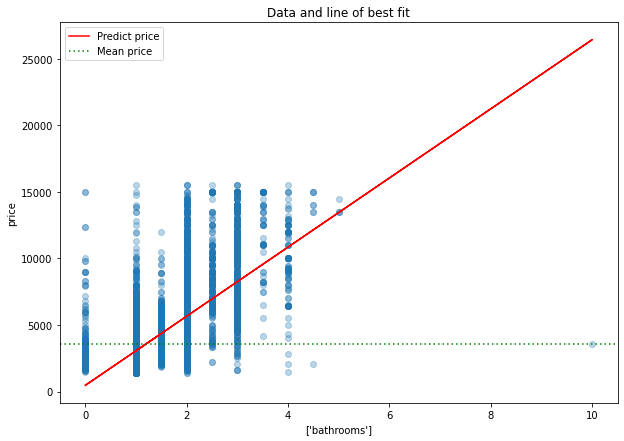

In [34]:
plotModel(df, ['bathrooms'], 'price', model7)

In [35]:
makeWidget(model7, df['bathrooms'].max(), 'bathrooms')

interactive(children=(FloatSlider(value=5.0, description='x_value', max=10.0), Output()), _dom_classes=('widge…

**Contrary to what the woman had said about Tribeca condos**, that people would hand over their children for a pre-war building, in the rentals it has absolutely no influence (the linear model is no different than the baseline, or mean price). R^2 may as well be 0.

In [36]:
model6 = regression(LinearRegression, df, ['pre-war'], 'price')

Coefficients = [-147.76479028]
 Bias = 3604.279592909719
MAE on test data: 1189.5372638124488
 R^2: 0.0003600111267862971


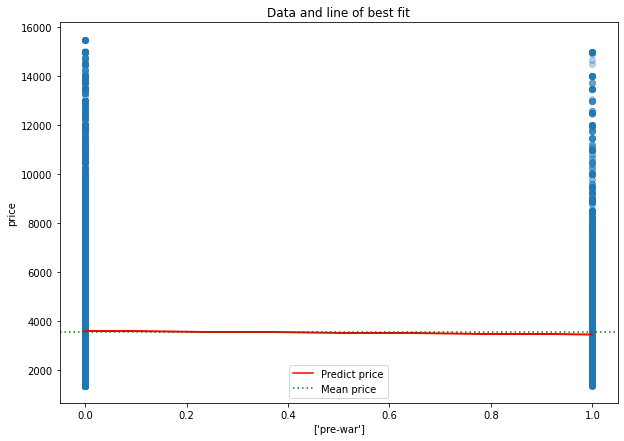

In [37]:
plotModel(df, ['pre-war'], 'price', model6)

### Multivariate models


In [38]:
model3 = regression(LinearRegression, df, ['bedrooms', 'bathrooms'], 'price')

Coefficients = [ 389.85887672 2116.54861315]
 Bias = 436.9709798516478
MAE on test data: 826.2019380146435
 R^2: 0.5017824734695985


In [39]:
predict([4, 4], model3)

10462.6

In [40]:
model4 = regression(LinearRegression, df, ['bedrooms', 'bathrooms', 'distance'],
                    'price')

Coefficients = [ 412.85985021 2058.81999109  -56.75270643]
 Bias = 767.4303833838417
MAE on test data: 822.2180385511514
 R^2: 0.5157084953645483


In [41]:
predict([3, 3, 0.5], model4)

8154.09

In [42]:
model5 = regression(LinearRegression, df, 
                    ['bedrooms', 'bathrooms', 'doorman', 'elevator', 'hardwood_floors'],
                    'price')

Coefficients = [ 452.31782934 1916.97361358  677.43198042  135.06734682  -91.21922767]
 Bias = 267.233772898574
MAE on test data: 775.3825147245294
 R^2: 0.5468141287837509


In [43]:
predict([3, 3, 1, 1, 1], model5)

8096.39